<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_HW_0401_TextMining1_Tokenization%2CStemming%2CLemmatization%2CBOW_MachineLearningGuide_466_486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. 텍스트 분석
### NLP냐 텍스트 분석이냐?
- 머신러닝이 보편화되며 NLP(Natural Language Processing)와 텍스트분석(Text Analysis)을 구분하는 것은 큰 의미가 없어 보인다.
---
- 굳이 구분하자면 **NLP**는 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술이 발전해 왔다.
- 텍스트분석(Text Mining)은 비정형 텍스트에서 의미있는 정보를 추출하는 것에 더 중점을 두고 기술이 발전해왔다.
---
- NLP : 언어해석을 위한 기계번역, 자동 질문 해석 후 답하는 질의응답 시스템. NLP는 텍스트분석을 향상하게 하는 기반기술. NLP기술이 발전함에 따라 텍스트 분석도 더욱 정교하게 발전할 수 있었다. NLP와 텍스트분석의 발전 근간에는 머신러닝이 있었다. 예전의 룰 기반 시스템(텍스트를 구성하는 언어적인 루이나 업무의 룰에 따라 텍스트를 분석하는)에서 머신러닝의 텍스트 데이터를 기반으로 모델을 학습하고 예측하는 기반으로 변경되면서 많은 기술적 발전이 가능해졌다.

- 텍스트 분석: 머신러닝, 언어이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측분석 등의 분석작업을 주로 수행한다. 머신러닝 기술에 힘입어 텍스트 분석은 크게 발전하고 있으며 주로 다음과 같은 기술 영역에 집중해왔다.
---
## 1. 텍스트 분석 이해
- 텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것이다.
- 텍스트를 머신러닝에 적용하기 위해 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는가 하는 것이 매우 중요한 요소이다.
- 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것을 **피처 벡터화** 또는 **피처 추출**이라고 한다. 대표적으로 텍스트를 피처 벡터화해서 변환하는 방법에는 BOW(Bag of Words)와 Word2Vec방법이 있다.



### 텍스트 분석 수행 프로세스
- 1. **텍스트 사전 준비작업**: 텍스트 클렌징,단어토큰화, 의미없는 단어(Stop word)제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업 수행
- 2. **피처 벡터화/추출**: 사전 준비작업으로 가공된 텍스트에서 피처 추출 후 여기에 벡터값을 할당. 대표적으로 BOW와 WordVec2가 있으며, BOW는 대표적으로 Count기반과 TF-IDF기반 벡터화가 있다.
- 3. **ML모델 수립 및 학습/예측/평가** : 피처벡터화된 데이터세트에 ML모델을 적용해 학습/예측/평가 수행




### 파이썬 기반의 NLP, 텍스트 분석 패키지
- NLTK, Gensim, SpaCv 등이 있다


## 2. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

### 1) 클렌징
- 텍스트에서 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업.
- ex) HTML,XML 태그나 특정 기호 등을 사전에 제거
### 2) 텍스트 토큰화
#### (1)문장 토큰화(Sentence Tokenization)
- 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리.
- 정규 표현식에 따른 문장 토큰화도 가능하다. NLTK에서 일반적으로 많이 쓰이는 sent_tokenizate를 이용해 token화를 수행할 수 있다.
- 다음은 3개의 문장으로 이루어진 텍스트 문서를 문장으로 각각 분리하는 예제이다.


In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- sent_tokenize()는 각 문장으로 구성된 list객체를 반환한다.

#### (2) 단어 토큰화(Word Tokenization)
- 공백, 콤마, 마침표 개행문자 등으로 단어를 분리한다. 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있다.
- Bag of Word와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분하다.
- NLTK에서 제공하는 word_tokenize()를 이용하여 단어로 토큰화를 할 수 있다.

In [ ]:
from nltk import word_tokenize
sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


- word_tokenize()는 각 단어로 구성된 list객체를 반환한다

- 이제, 문서를 문장으로 나눈 후 개별 문장을 단어로 토큰화하는 tokenize_text() 함수를 생성하자

In [ ]:
# sent_tokenize 와 word_tokenize 를 조합하여 tokenize_text() 생성
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 문장을 단어별로 하나씩 토큰화할 경우 문맥적인 의미는 무시된다. 이 문제를 해결하기 위해  **n-gram**을 도입할 수 있다. n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해낸다.
 > Ex) "Agent Smith knocks the door"에 2-gram을 하면 (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동하면서 단어들을 토큰화한다.

### 3) 필터링/스톱워드 제거/철자 수정

#### 스톱워드(Stop word) 제거
- 스톱워드: 분석에 큰 의미가 없는 단어. 문장을 구성하는 필수 문법요소이지만 문맥적으로 큰 의미X. 빈번하게 텍스트에 출현. 사전제거하지 않으면 그 빈번함으로 인해 중요단어로 인식될 수 있다.
- 언어별로 스톱워드가 목록화되어 있다. NLTK의 경우 가장 다양한 언어의 스톱워드를 제공한다.
> ex) is, the, a, will
- NLTK의 스톱워드에는 어떤 것이 있는지 알아보자


In [ ]:
import nltk
nltk.download("stopwords")
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- 영어의 stop word 개수는 179개이다
- 그 중 20개는 위와 같다
- 이제 stop word를 필터링으로 제거하여 의미있는 단어만 추출해보자

In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]



### 4) Stemming & Lemmatization
- Stemming과 Lemmatization은 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것이다.
- Stemming : 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출
> Stemmer : Porter, Lancaster, Snowball Stemmer
- Lemmatization : 이 Stemming보다 정교하며 의미론적 기반에서 단어의 원형을 찾는다. 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근단어를 찾아준다. Stemming보다 변환에 시간이 더 오래 걸린다.
> Lemmatizer: WordNetLemmatizer

In [ ]:
## Stemmer
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer() # stemmer 객체 생성

print(stemmer.stem('working'), stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- 단어의 원형을 그대로 찾기도 하지만 단어를 분할하게 되므로 원형을 제대로 찾지 못하기도 한다.

In [ ]:
## Lemmatizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


- Lemmatizer는 단어의 품사를 집접 입력해야 한다. (v는 동사, a는 형용사 의미)
- Lemmatizer는 시간이 더 걸리지만 정확한 원형 단어를 추출해준다.

## 3. Bag of Words - BOW
- Bag of Words : 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처값을 추출하는 모델이다.
- 문서 내 모든 값을 봉투(Bag)에 넣은 뒤 흔들어 섞는다는 의미로 Bag of Words(BOW) 모델이라고 한다.

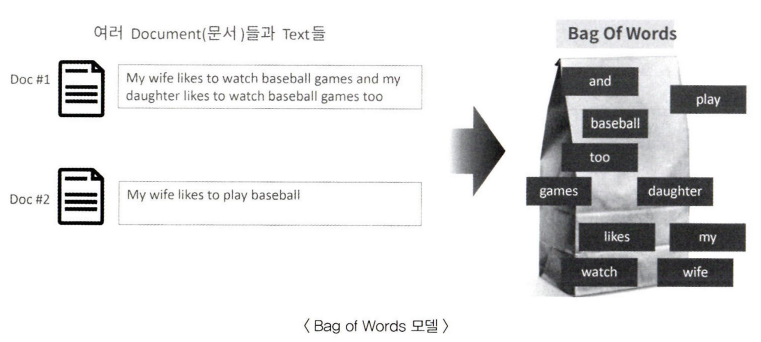

- 다음과 같은 2개의 문장이 있다고 가정하고 이 문장을 Bag of Words의 단어 수(Word Count)기반으로 피처를 추출해보자


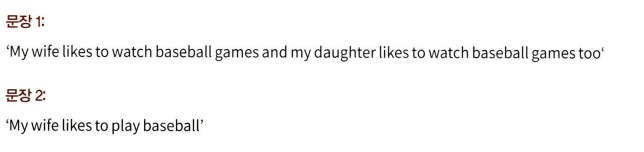

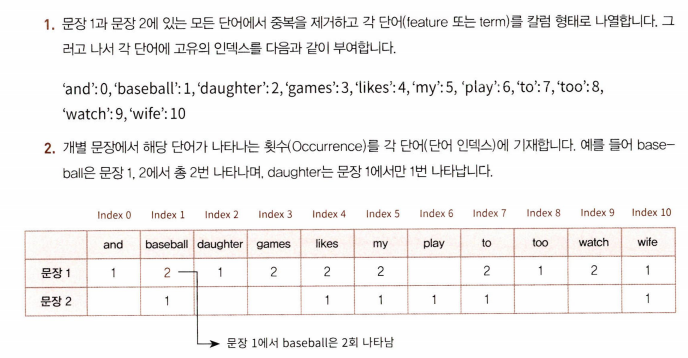

- BOW 모델의 장점 : 쉽고 빠른 구축. 단순히 단어 발생 횟수에 기반하지만 예상보다 문서의 특징을 잘 나타낼 수 있는 모델이다. 전통적으로 여러 분야에서 활용도가 높다.
- BOW 모델의 단점 :
> - 문맥의미(Semantic Context)의 반영 부족 : BOW는 단어의 순서를 고려X => 단어의 문맥적 의미가 무시된다. 이를 보완하기 위해 n-gram 사용, but 제한적.
>
> - 희소행렬문제(희소성, 희소행렬) :  BOW로 피처 벡터화를 수행 시 희소 행렬 형태의 데이터셋이 만들어지기 쉽다. 많은 문서에서 단어 추출 시 매우 많은 단어가 column으로 만들어진다. 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많다. 즉 대부분의 문서에서 단어의 총개수는 수만~수십만인 것에 반해 하나의 문서에 있는 단어는 이 중 극히 일부분이므로 대부분의 데이터는 0값으로 채워지게 된다. 이처럼 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬을 **희소행렬(Sparse Matrix)**라고 한다. 이와 달리 대부분의 값이 0이 아닌 의미있는 값으로 채워져 있는 행렬을 **밀집행렬(Dense Matrix)**라고 한다. 희소 행렬은 일반적으로 ML 알고리즘의 수행 시간과 예측성능을 떨어뜨리므로 희소 행렬을 위한 특별한 기법이 마련되어 있다.

#### BOW 피처 벡터화
> - **피처 벡터화**:
머신러닝에 적용(머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받는다)하기 위해 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환하는 것.각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생빈도와 같은 값을 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법이다. 피처 벡터화는 기존 텍스트 데이터를 또다른 형태의 피처의 조합으로 변경하기 때문에 넓은 범위의 피처 추출에 포함한다.(Text Anlaysis에서는 피처벡터화==피처추출)


- **BOW 모델에서 피처벡터화** : BOW 피처 벡터화의 두 가지 방식. 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터세트 모델으로 변경하는 것이다. 예를 들어 M개의 텍스트 문서가 있고, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 문서의 피처 벡터화를 수행하면 M개의 문서는 각각 N개의 값이 할당된 피처의 벡터 세트가 된다. 결과적으로는  M X N 개의 단어피처로 이루어진 행렬을 구성하게 된다.
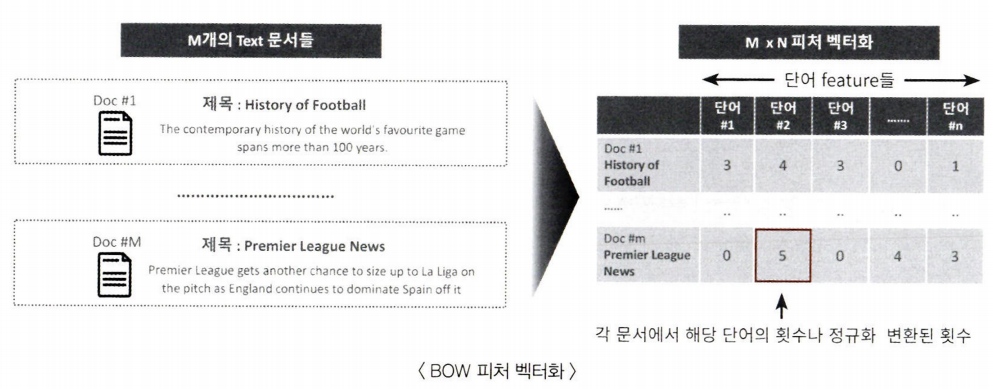


- BOW의 2가지 피처 벡터화 방식
> - **카운트 기반의 벡터화** : 각 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 count를 부여함. 카운트값이 높을수록 중요한 단어. 카운트만 부여하므로 문서의 특징을 나타내기보다 언어의 특성상 문장에서 자주 사용되는 단어까지 높은 값을 부여할 가능성이 높다는 단점이 있다.
> - **TF-IDF(Term Frequency Inverse Document Frequency) 벡터화** : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여. 카운트 기반의 벡터화 문제 보완


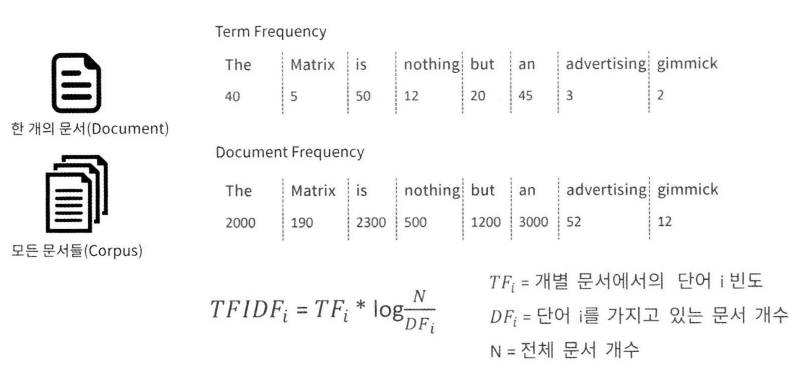

#### 사이킷런의 Count 및 TF-IDF벡터화 구현: CountVectorizer, TfidfVectorizer

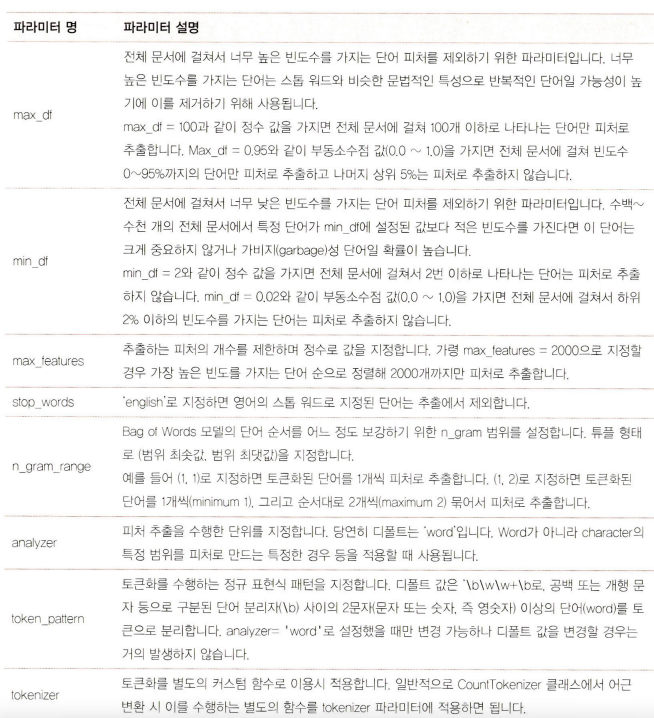

#### BOW 벡터화를 위한 희소 행렬
- CountVectorizer, TfidfVectorizer는 텍스트를 피처 단위로 벡터화해 변환하고 CSR형태의 희소 행렬을 반환한다.
-  **희소행렬**: 대규모 행렬의 대부분의 값을 0이 차지하는 행렬. BOW형태를 가진 언어모델의 피처 벡터화는 대부분 희소 행렬이다.
- 희소행렬은 너무 많은 불필요한 0값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 행렬의 크기가 커서 연산 시에도 데이터 엑세스를 위한 시간이 많이 소모된다. 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 한다. **COO형식**과 **CSR 형식**이 대표적이다.
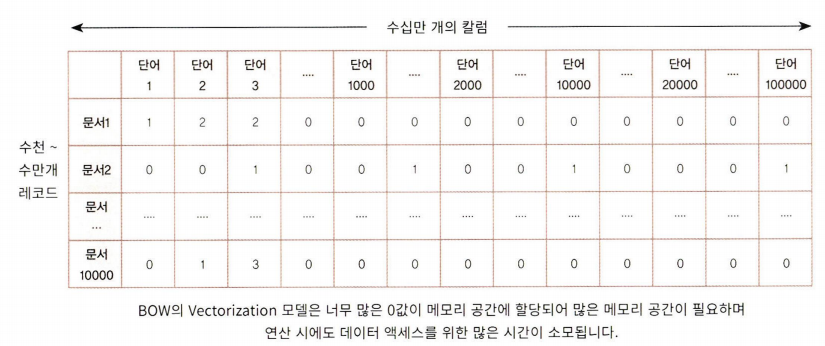

#### 희소행렬 - COO(Coordinate) 형식
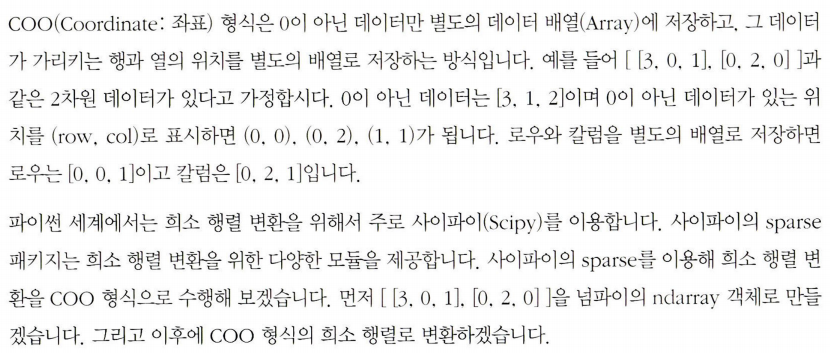

In [ ]:
import numpy as np
dense =np.array([[3,0,1],[0,2,0]])

- 위 밀집행렬을 사이파이의 coo_matrix 클래스를 이용해 COO형식의 희소 행렬으로 변환해보자. 0이 아닌 데이터를 별도의 배열 데이터로 만들고, 행 위치 배열과 열 위치 배열을 각각 만든 후 coo_matrix() 내에 생성 파라미터로 입력하면 된다.

In [ ]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

- sparse_coo는 COO형식의 희소행렬객체변수이다. 이를 toarray()메서드를 이용해 다시 밀집형태의 행렬으로 출력해 보자.

In [ ]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- 다시 원래의 데이터행렬으로 추출된다.

#### 희소 행렬 - CSR 형식
- CSR 형식은 COO형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식이다.
- 먼저 COO 변환 형식의 문제점을 알아보자. 다음과 같은 2차원 배열을 COO형식으로 변환해보자.


In [ ]:
'[[0,0,1,0,0,5],[1,4,0,3,2,5],[0,6,0,3,0,0],[2,0,0,0,0,0], [0,0,0,7,0,8], [1,0,0,0,0,0]]'

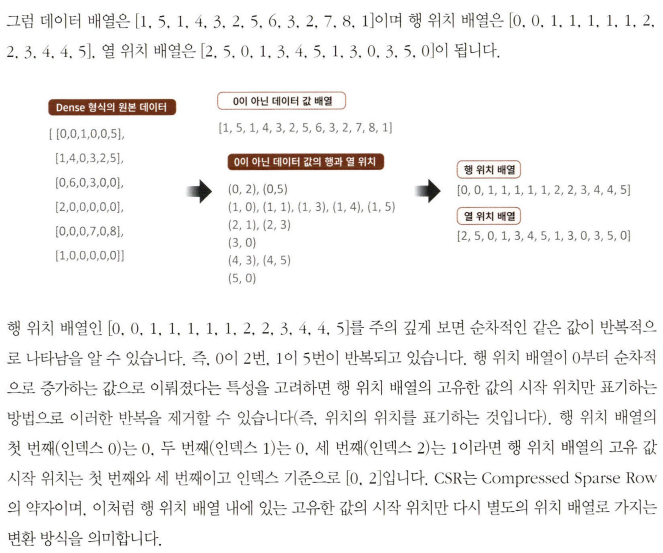

- CSR방식의 변환은 사이파이의 csr_matrix 클래스를 이용해 쉽게 할 수 있다. 0이 아닌 데이터 배열과 열 위치 배열 그리고 행 위치 배열의 고유한 값의 시작위치배열을 csr_matrix의 생성 파라미터로 입력하면 된다.


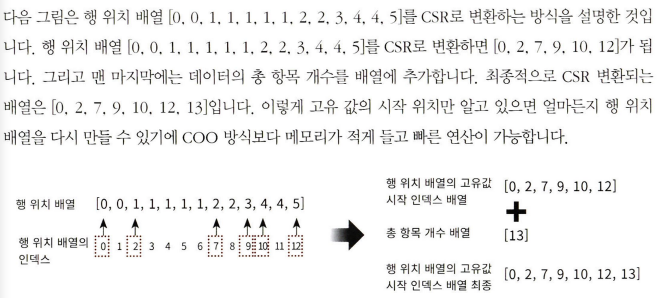

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


- 사이킷런의 CountVectorizer나 TfidVectorizer클래스로 변환된 피처 벡터화 행렬은 모두 사이파이의 CSR형태의 희소 행렬이다.